# Sugestão de metodologia para cálculo de Intervalos de Confiança 

Conforme mencionado na LDO de 2018, o modelo oficial do governo se define como determinístico: 

“[...] *ou seja, a partir da fixação de um conjunto de variáveis, o modelo determina de maneira única seus resultados* [...]

Como se trabalha com probabilidades, não necessariamente todos os eventos previstos podem acontecer. O modelo da LDO é determinístico por trabalhar apenas com médias (ex: média de pessoas que se aposentarão) e não considera diferentes cenários onde isso pode não ocorrer, ou seja, situações diferentes do comportamento médio.

Este documento busca apresentar uma forma diferente de se projetar estoques considerando diferentes cenários onde nem sempre os segurados irão se aposentar.

## Método determinístico

Considere o seguinte cenário:
* Segurados = 1000
* Probabilidade de se aposentar = 0.35

A forma mais simples e utilizada na LDO de se calcular o número de aposentados é:

*num_ap = segurados x Probabilidade*

*num_ap = 1000 x 0.35 = * ***350***


## Método probabilístico

Como se trata de uma probabilidade, o evento de *se aposentar* pode ou não ocorrer para cada segurado.
Diante disso, uma outra forma de se calcular o estoque de aposentados, seria calcular individualmente a probabilidade 
de cada segurado se aposentar.

Esse cálculo individual seria feito através de números aleatórios, onde para cada segurado gera-se um número aleatório o qual é 
comparado com a probabilidade de se aposentar, conforme apresentado abaixo:


In [19]:
import numpy as np

n_segurados = 1000
prob = 0.35

# Lista que salva a quantidade de aposentados para cada cenário
lista_nap = []

# Lista de seeds -> 50 cenários
seeds = range(0,50)

# Executa 50 cenários (seeds) diferentes
for seed in seeds:

    # Define o seed para geração de números aleatórios
    np.random.seed(seed)
    # Gera 1000 números aletórios entre 0 e 
    lista_na = np.random.rand(n_segurados)

    # Número de aposentados
    num_ap = 0

    # Determina quantos irão se aposentar para o cenário
    for na in lista_na:
        # calcula a probabilidade de cada um dos segurados se aposentar
        # Se o número aleatório for menor ou igual a probabilidade o segurado irá se aposentar
        if na <= prob: 
            num_ap += 1

    lista_nap.append(num_ap)


Observem que diferente do método simples, para cada cenário (seed) ocorre uma situação diferente, ou seja, o número de segurados que se aposenta é diferente:

In [20]:
print(lista_nap)

[353, 347, 369, 353, 383, 333, 370, 330, 360, 335, 341, 358, 334, 343, 350, 360, 344, 347, 364, 331, 349, 343, 345, 344, 344, 357, 348, 344, 343, 363, 367, 334, 362, 347, 328, 361, 350, 314, 341, 350, 367, 360, 338, 337, 356, 385, 338, 325, 324, 356]


Se calcularmos a média, temos um valor bem próximo ao do **Método determinístico**.

In [21]:
media = np.mean(lista_nap)
print('Média: {}'.format(media))

Média: 348.5


Porém, com diferentes cenários, podemos calcular medidas de dispersão, como o desvio padrão.

In [22]:
std = np.std(lista_nap)
print('Desvio padrão: {}'.format(std))

Desvio padrão: 14.497241116847025


Visualizando em um gráfico:

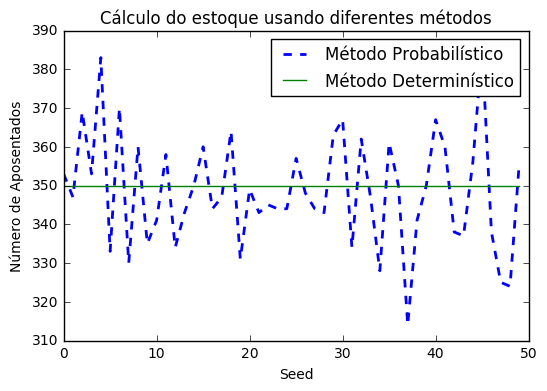

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

medias = [350] * len(seeds)

fig, ax = plt.subplots()
ax.plot(seeds, lista_nap, '--', linewidth=2, label='Método Probabilístico')
ax.plot(seeds, medias,label='Método Determinístico')
ax.set_ylabel('Número de Aposentados')
ax.set_xlabel('Seed')
ax.set_title('Cálculo do estoque usando diferentes métodos')
ax.legend()
plt.show()

Aplicando o método probabilístico no cálculo dos estoques (onde as probabilidades são aplicadas), teremos para cada seed, uma projeção/resultado diferente.

Na média o resultado vai ser o mesmo obtido pelo método original, porém teremos diversas curvas ou pontos para cada ano, o que nos permite calcular medidas de dispersão como desvio padrão e ** Intervalos de Confiança ** para os resultados de receita e despesa.


In [24]:
np.var(lista_nap)


210.16999999999999